In [6]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [7]:
import matplotlib.pyplot as pl
from meso_tools.io_utils import read_scanimage_metadata as get_meta
from meso_tools.io_utils import read_tiff, write_tiff
from meso_tools.stitch_full_field import *
import sciris as sc

### edit cell below to have correct session ID

In [8]:
session_id =  1242287850       

In [9]:
#Inputs:
path_to_tiff = f"D:\\scanimage_ophys\\data/{session_id}\\{session_id}_fullfield.tiff"
surface_path = f"D:\\scanimage_ophys\\data\\{session_id}\\{session_id}_averaged_surface.tiff"

#Outputs: 
meta_path = f"D:\\scanimage_ophys\\data/{session_id}\\{session_id}_fullfield_metadata.dict"
path_to_tiff_stitched = f"D:\\scanimage_ophys\\data/{session_id}\\{session_id}_fullfield_stitched.tiff"
path_to_tiff_mapped = f"D:\\scanimage_ophys\\data/{session_id}\\{session_id}_fullfield_stitched_mapped.tiff"

#reading tiff and it's metadata, saving metadata to a dict object to disk
tiff_array = read_tiff(path_to_tiff)
meta = get_meta(path_to_tiff)
ff_meta_dict = read_full_field_meta(meta)
ff_meta_dict = check_meta(ff_meta_dict)
check_tiff(tiff_array, ff_meta_dict)
output_tiff_shape, gap = check_tiff(tiff_array, ff_meta_dict)
sc.saveobj(meta_path, ff_meta_dict)

#averaging and stitching stack, writing stitched stack in a tiff file to disk
ff_averaged_tiff = average_tiff(tiff_array, ff_meta_dict)
ff_stitched_tiff, ff_meta_dict = stitch_tiff(ff_averaged_tiff, ff_meta_dict, gap, output_tiff_shape)
write_tiff(path_to_tiff_stitched, ff_stitched_tiff)

#splitting surface file, mapping surface images to full field, saving into a tiff
split_surface_meta, surface_averaged = split_surface(surface_path)
ff_stitched_mapped = insert_surface_to_ff(ff_stitched_tiff, ff_meta_dict, split_surface_meta)
write_tiff(path_to_tiff_mapped, ff_stitched_mapped)

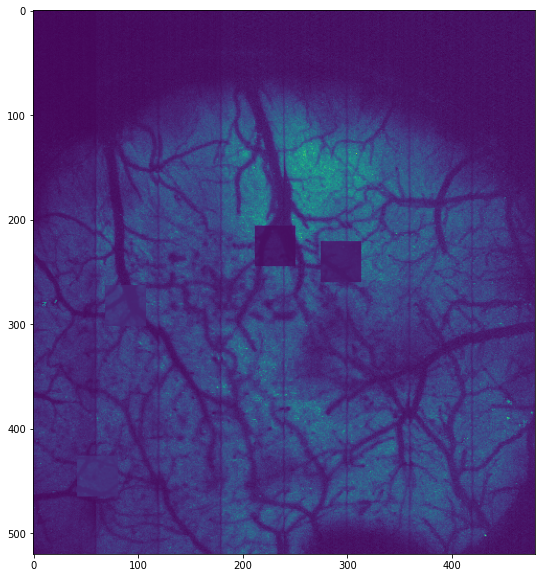

In [10]:
#showing mapped image
pl.figure(figsize =[10,10])
pl.imshow(ff_stitched_mapped)